<a href="https://colab.research.google.com/github/ChintalapudiDivya/test/blob/master/78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade catboost

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Test_data.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


normal     13449
anomaly    11743
Name: class, dtype: int64

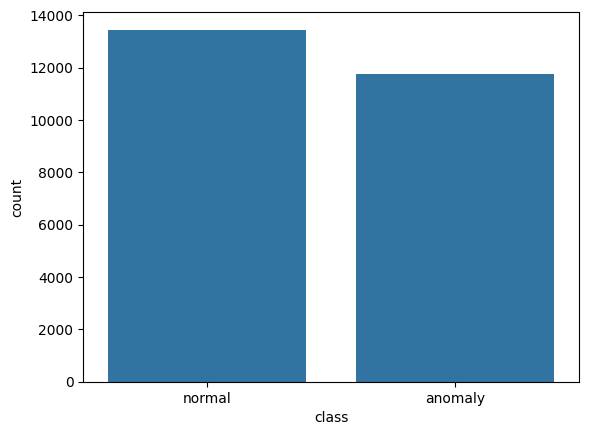

In [ ]:
# Creating a count plot
sns.countplot(x=train['class'])
train['class'].value_counts()

In [ ]:
from time import time
t0 = time()
print(train.groupby('protocol_type')['protocol_type'].count())
time() - t0

protocol_type
icmp     1655
tcp     20526
udp      3011
Name: protocol_type, dtype: int64


0.03672432899475098

In [ ]:
from time import time
t0 = time()
print(train.groupby('service')['service'].count())
time() - t0

service
IRC           40
X11           22
Z39_50       172
auth         189
bgp          146
            ... 
urp_i        124
uucp         157
uucp_path    133
vmnet        107
whois        145
Name: service, Length: 66, dtype: int64


0.03592395782470703

In [ ]:
from time import time
t0 = time()
print(train.groupby('flag')['flag'].count())
time() - t0

flag
OTH           5
REJ        2216
RSTO        304
RSTOS0       21
RSTR        497
S0         7009
S1           88
S2           21
S3           15
SF        14973
SH           43
Name: flag, dtype: int64


0.0338902473449707

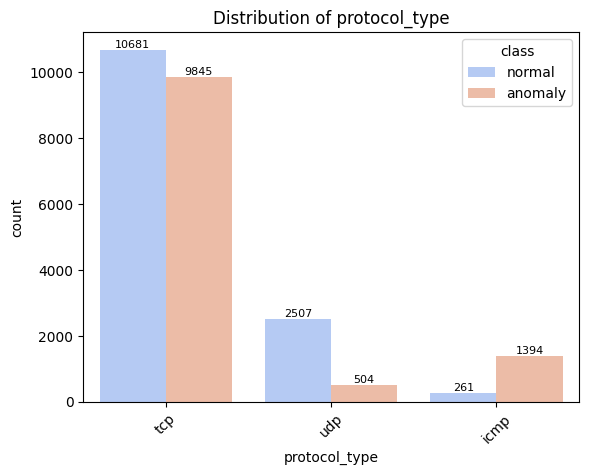

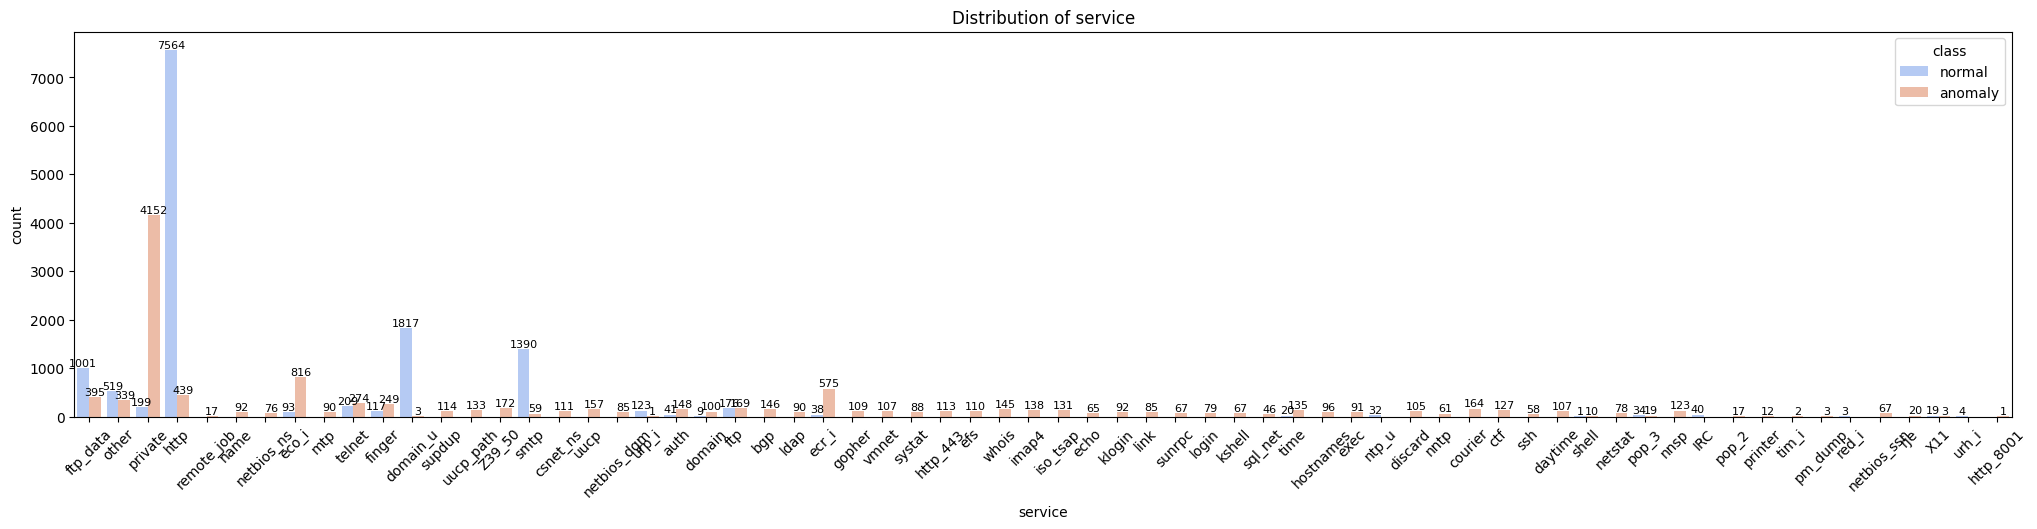

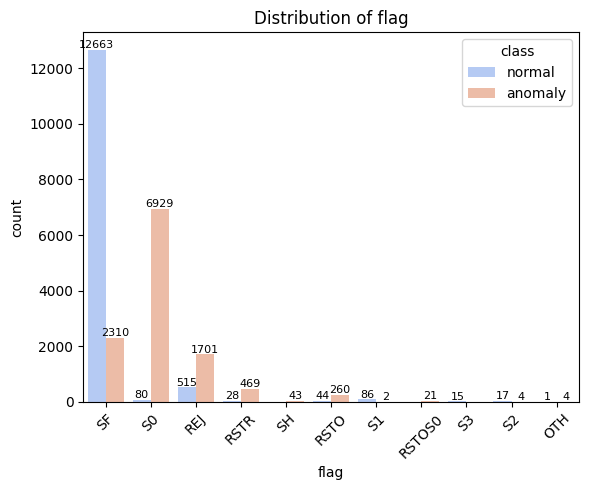

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    ax = sns.countplot(x=category, data=train, hue='class', palette="coolwarm")

    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", label_type="edge", fontsize=8, color="black")

    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

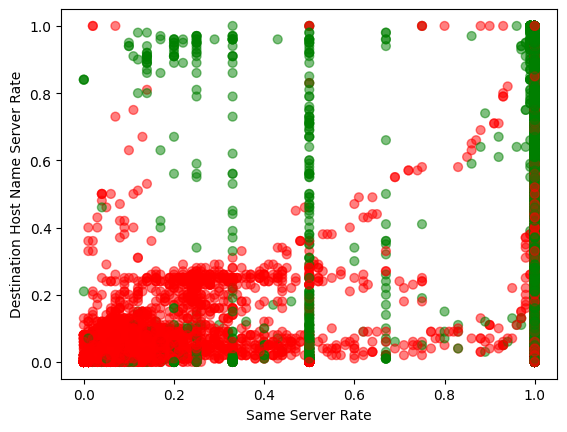

In [ ]:
import matplotlib
labels = train['class']
colors = ['green','red']
y = train['dst_host_same_srv_rate']
x = train['same_srv_rate']
plt.scatter(x,y, c=labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=40)
plt.xlabel("Same Server Rate")
plt.ylabel("Destination Host Name Server Rate")
plt.show()

In [ ]:
missing_values = train.isnull().sum().sum()
print(missing_values)

0


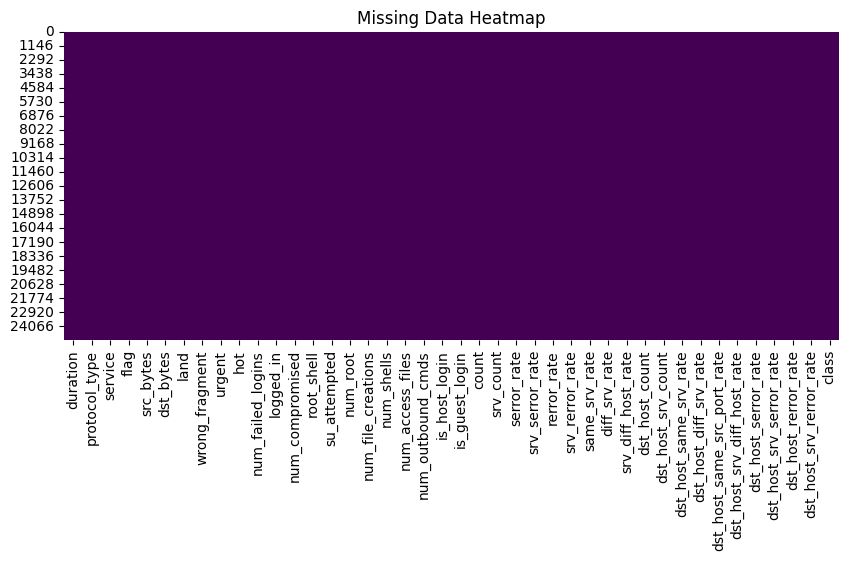

In [ ]:
#Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: >

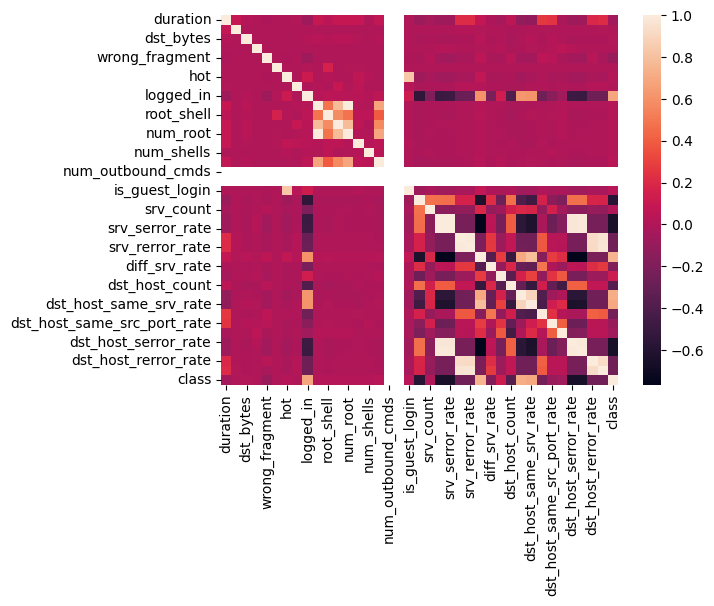

In [ ]:
import numpy as np
col_names = train.columns
type(col_names)
num_cols = col_names.drop(['protocol_type', 'flag', 'service'])
train[num_cols] = train[num_cols].apply(pd.to_numeric, errors='coerce')
corr_df = train[num_cols].corr()
sns.heatmap(corr_df)

In [ ]:
print(train['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [ ]:
outbounds_stats = train['num_outbound_cmds'].describe()
print(outbounds_stats)

count    25192.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_outbound_cmds, dtype: float64


In [ ]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)



#Feature Scaling

In [ ]:
# Drop the 'class' column to create the feature matrix X
X_train = train.drop(['class'], axis=1)
# Extract the 'class' column to create the target variable y
Y_train = train['class']

#Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [ ]:
#updating your training set X_train by keeping only the selected features
X_train = X_train[selected_features]

#normalisation using minmax

In [ ]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()
#You create a MinMaxScaler instance.
#You fit the scaler on your training data (X_train) and simultaneously transform it, scaling the features.
#The scaled features are stored in X_train.
X_train = scaler.fit_transform(X_train)


#applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)

#splitting DataSet

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
print("Shape of the training input X:", X_train.shape)
print("Shape of the training output y:", Y_train.shape)
print("Shape of the testing input X:", x_test.shape)
print("Shape of the testing output y:", y_test.shape)

Shape of the training input X: (17634, 10)
Shape of the training output y: (17634,)
Shape of the testing input X: (7558, 10)
Shape of the testing output y: (7558,)


#Gradient Boosting Classifier

In [ ]:
xgb_classifier = GradientBoostingClassifier()
xgb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
xgb_pred = xgb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9720825615242128
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3498
           1       0.97      0.98      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Assuming you have X_train_PCA, y_train, X_test_PCA, and y_test

# Create a GradientBoostingClassifier
xgb_classifier = GradientBoostingClassifier()

# Fit the model
xgb_classifier.fit(X_train, Y_train)

# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(xgb_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
xgb_pred = xgb_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Cross-validated Accuracy Scores: [0.97022966 0.96909555 0.97136377 0.96455912 0.96483267]
Average Accuracy: 0.9680161515549521

Accuracy on the Test Set: 0.9720825615242128
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3498
           1       0.97      0.98      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



#Train CatBoost classifier

In [ ]:
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, Y_train)

Learning rate set to 0.035085
0:	learn: 0.6224661	total: 9.99ms	remaining: 9.98s
1:	learn: 0.5577270	total: 17.9ms	remaining: 8.92s
2:	learn: 0.5003580	total: 25.6ms	remaining: 8.51s
3:	learn: 0.4643301	total: 33.2ms	remaining: 8.28s
4:	learn: 0.4306458	total: 41ms	remaining: 8.15s
5:	learn: 0.4034798	total: 50.5ms	remaining: 8.37s
6:	learn: 0.3705369	total: 58.3ms	remaining: 8.28s
7:	learn: 0.3421791	total: 66.4ms	remaining: 8.23s
8:	learn: 0.3247586	total: 74.2ms	remaining: 8.16s
9:	learn: 0.3037403	total: 82.1ms	remaining: 8.12s
10:	learn: 0.2902482	total: 89.9ms	remaining: 8.08s
11:	learn: 0.2722429	total: 98ms	remaining: 8.06s
12:	learn: 0.2592008	total: 106ms	remaining: 8.05s
13:	learn: 0.2454993	total: 114ms	remaining: 8.03s
14:	learn: 0.2318666	total: 122ms	remaining: 7.99s
15:	learn: 0.2226490	total: 130ms	remaining: 7.98s
16:	learn: 0.2141673	total: 137ms	remaining: 7.94s
17:	learn: 0.2053150	total: 145ms	remaining: 7.91s
18:	learn: 0.1959330	total: 153ms	remaining: 7.9s
19:	

In [ ]:
catboost_pred = catboost_classifier.predict(x_test)
accuracy = accuracy_score(y_test, catboost_pred)
report = classification_report(y_test, catboost_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9861074358295846
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3498
           1       0.98      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Assuming you have X (features) and y (labels)
# Replace 'your_data.csv' with the actual path or method to load your dataset
# You may need to preprocess your data, split it into features (X) and labels (y)

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Extract features (X) and labels (y)
# X = df.drop('label_column', axis=1)  # Adjust 'label_column' to your actual label column name
# y = df['label_column']
# Fit the model

catboost_classifier.fit(X_train, Y_train)


# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(catboost_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
catboost_pred = catboost_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, catboost_pred)
report = classification_report(y_test, catboost_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Streaming output truncated to the last 5000 lines.
18:	learn: 0.2049461	total: 147ms	remaining: 7.59s
19:	learn: 0.1989058	total: 164ms	remaining: 8.02s
20:	learn: 0.1943247	total: 179ms	remaining: 8.34s
21:	learn: 0.1874958	total: 186ms	remaining: 8.27s
22:	learn: 0.1817963	total: 193ms	remaining: 8.2s
23:	learn: 0.1739723	total: 200ms	remaining: 8.13s
24:	learn: 0.1692917	total: 208ms	remaining: 8.12s
25:	learn: 0.1645902	total: 216ms	remaining: 8.08s
26:	learn: 0.1568004	total: 223ms	remaining: 8.02s
27:	learn: 0.1535153	total: 230ms	remaining: 7.97s
28:	learn: 0.1507503	total: 237ms	remaining: 7.93s
29:	learn: 0.1479771	total: 244ms	remaining: 7.88s
30:	learn: 0.1450530	total: 251ms	remaining: 7.83s
31:	learn: 0.1431394	total: 263ms	remaining: 7.95s
32:	learn: 0.1397523	total: 270ms	remaining: 7.91s
33:	learn: 0.1377705	total: 277ms	remaining: 7.87s
34:	learn: 0.1349519	total: 284ms	remaining: 7.84s
35:	learn: 0.1320582	total: 291ms	remaining: 7.8s
36:	learn: 0.1304242	total: 298ms

#KNN Classifier

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9900767398782747
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


# Assuming you have X (features) and y (labels)
# Replace 'your_data.csv' with the actual path or method to load your dataset
# You may need to preprocess your data, split it into features (X) and labels (y)

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Extract features (X) and labels (y)
# X = df.drop('label_column', axis=1)  # Adjust 'label_column' to your actual label column name
# y = df['label_column']
# Fit the model
y = y.dropna()
knn_classifier.fit(X_train, Y_train)


# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(knn_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
knn_pred = knn_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Cross-validated Accuracy Scores: [0.98383896 0.9863907  0.98780834 0.98610717 0.98355077]
Average Accuracy: 0.985539186320711

Accuracy on the Test Set: 0.9900767398782747
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



#Support Vector Machine Classifier

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
svm_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, svm_pred)
report = classification_report(y_test, svm_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9363588250860015
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3498
           1       0.92      0.96      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.93      0.94      7558
weighted avg       0.94      0.94      0.94      7558



In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


# Assuming you have X (features) and y (labels)
# Replace 'your_data.csv' with the actual path or method to load your dataset
# You may need to preprocess your data, split it into features (X) and labels (y)

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Extract features (X) and labels (y)
# X = df.drop('label_column', axis=1)  # Adjust 'label_column' to your actual label column name
# y = df['label_column']
# Fit the model
y = y.dropna()
svm_classifier.fit(X_train, Y_train)


# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(svm_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
svm_pred = svm_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, svm_pred)
report = classification_report(y_test, svm_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Cross-validated Accuracy Scores: [0.93620641 0.93790757 0.93960873 0.93138645 0.94214407]
Average Accuracy: 0.9374506461056198

Accuracy on the Test Set: 0.9363588250860015
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3498
           1       0.92      0.96      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.93      0.94      7558
weighted avg       0.94      0.94      0.94      7558



#QuadraticDiscriminantAnalysis

In [ ]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
qda_pred = qda_classifier.predict(x_test)
accuracy = accuracy_score(y_test, qda_pred)
report = classification_report(y_test, qda_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9053982535062186
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3498
           1       0.87      0.97      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.90      7558
weighted avg       0.91      0.91      0.90      7558



In [ ]:
import pandas as pd

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


# Assuming you have X (features) and y (labels)
# Replace 'your_data.csv' with the actual path or method to load your dataset
# You may need to preprocess your data, split it into features (X) and labels (y)

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Extract features (X) and labels (y)
# X = df.drop('label_column', axis=1)  # Adjust 'label_column' to your actual label column name
# y = df['label_column']
# Fit the model
y = y.dropna()
qda_classifier.fit(X_train, Y_train)


# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(qda_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
qda_pred = qda_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, qda_pred)
report = classification_report(y_test, qda_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Cross-validated Accuracy Scores: [0.90019847 0.92401474 0.90927134 0.90586901 0.90612592]
Average Accuracy: 0.9090958959978295

Accuracy on the Test Set: 0.9053982535062186
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3498
           1       0.87      0.97      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.90      7558
weighted avg       0.91      0.91      0.90      7558



#GaussianNB

In [ ]:
nb_classifier =GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nb_pred = nb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred)
report = classification_report(y_test, nb_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8666313839640116
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      3498
           1       0.83      0.95      0.88      4060

    accuracy                           0.87      7558
   macro avg       0.88      0.86      0.86      7558
weighted avg       0.87      0.87      0.86      7558



In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


# Assuming you have X (features) and y (labels)
# Replace 'your_data.csv' with the actual path or method to load your dataset
# You may need to preprocess your data, split it into features (X) and labels (y)

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Extract features (X) and labels (y)
# X = df.drop('label_column', axis=1)  # Adjust 'label_column' to your actual label column name
# y = df['label_column']
# Fit the model
y = y.dropna()
nb_classifier.fit(X_train, Y_train)


# Use k-fold cross-validation (let's say k=5)
cv_scores = cross_val_score(nb_classifier, X_train, Y_train, cv=5)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Calculate and print the average accuracy
average_accuracy = cv_scores.mean()
print(f"Average Accuracy: {average_accuracy}")

# Predict on the test set
nb_pred = nb_classifier.predict(x_test)

# Calculate accuracy and print classification report on the test set
accuracy = accuracy_score(y_test, nb_pred)
report = classification_report(y_test, nb_pred)

print(f"\nAccuracy on the Test Set: {accuracy}")
print("Classification Report:")
print(report)

Cross-validated Accuracy Scores: [0.86022115 0.91182308 0.86645875 0.87354692 0.86642087]
Average Accuracy: 0.8756941548553167

Accuracy on the Test Set: 0.8666313839640116
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      3498
           1       0.83      0.95      0.88      4060

    accuracy                           0.87      7558
   macro avg       0.88      0.86      0.86      7558
weighted avg       0.87      0.87      0.86      7558

